# **ANALISIS KLASIFIKASI RISIKO DIABETES TAHAP AWAL MAHASISWA TEKNOLOGI SAINS DATA ANGKATAN 2022**

# Anggota Kelompok 7


1.   Sumayyah Asysyahidah (164221007)
2.   Riska Lathifah (164221009)
3.   Manda Diana Putri (164221048)
4.   Putu Angga Kurniawan (164221098)
5.   Ulvi Azzahra (164221109)

Penelitian ini bertujuan mengklasifikasi diabetes tahap awal pada Mahasiswa Teknologi Sains Data angkatan 2022 di Universitas Airlangga. Total data test yag kami amati sebesar 90 observasi, sedangkan data train yang kami gunakan sebesar 520 observasi.

Berikut adalah link data yang akan kami analisis.

- Data Train: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

- Data Test: https://docs.google.com/spreadsheets/d/1m5wzH-JHTb-AXh153pa4r7GCs-sqQQ39lqgqYNGDkpI/edit?usp=drive_link

# Import Library

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import auc, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import warnings
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
train_file_id = '17LW0Cs0TZZasCZ5-pXp3GrMJC-ww_I_4'
train_output_file = '/content/diabetes_data_upload.csv'
train_download_url = f'https://drive.google.com/uc?id={train_file_id}'
gdown.download(train_download_url, train_output_file, quiet=False)
train_data = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=17LW0Cs0TZZasCZ5-pXp3GrMJC-ww_I_4
To: /content/diabetes_data_upload.csv
100%|██████████| 34.7k/34.7k [00:00<00:00, 43.6MB/s]


In [ ]:
test_file_id = '1FYmr3uzOd2mgzQDHdxyGywmEGVpLKZ4C'
test_output_file = '/content/test_data.csv'
test_download_url = f'https://drive.google.com/uc?id={test_file_id}'
gdown.download(test_download_url, test_output_file, quiet=False)
test_data = pd.read_csv(test_output_file)

Downloading...
From: https://drive.google.com/uc?id=1FYmr3uzOd2mgzQDHdxyGywmEGVpLKZ4C
To: /content/test_data.csv
100%|██████████| 9.36k/9.36k [00:00<00:00, 15.8MB/s]


In [ ]:
predict_file_id = '13VZGNMZIWutS6U7q6LOZjDzspHu9nDrt'
predict_output_file = '/content/prediction_diabet.csv'
predict_download_url = f'https://drive.google.com/uc?id={predict_file_id}'
gdown.download(predict_download_url, predict_output_file, quiet=False)
predict = pd.read_csv(predict_output_file)

Downloading...
From: https://drive.google.com/uc?id=13VZGNMZIWutS6U7q6LOZjDzspHu9nDrt
To: /content/prediction_diabet.csv
100%|██████████| 1.18k/1.18k [00:00<00:00, 2.37MB/s]


In [ ]:
train_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
test_data.head()

,ID,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,164221056,20,Laki-laki,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,164221069,20,Perempuan,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ya,Tidak
2,164221046,19,Laki-laki,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,164221048,20,Perempuan,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak
4,164221066,20,Laki-laki,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak


In [ ]:
predict.head()

,ID,Class
0,164221056,0
1,164221069,1
2,164221046,1
3,164221048,0
4,164221066,0


# Simple Random Sampling



In [ ]:
# Membuat daftar data
data = [
    {"ID": 164221005, "Nama": "MUHAMMAD YAHYA OKTAVIYANTO"},
    {"ID": 164221007, "Nama": "SUMAYYAH ASYSYAHIDAH"},
    {"ID": 164221009, "Nama": "RISKA LATHIFAH"},
    {"ID": 164221010, "Nama": "AQILA HANA WINANGGORO"},
    {"ID": 164221011, "Nama": "MICHAEL ALBERT THEOJAYA"},
    {"ID": 164221013, "Nama": "RICHO WIGNYO AJI SAPUTRA"},
    {"ID": 164221014, "Nama": "MUHAMMAD RAZZAN RAMADHANA"},
    {"ID": 164221015, "Nama": "KYLA BELVA QUEENA"},
    {"ID": 164221016, "Nama": "JIHAN ASHIFA HAKIM"},
    {"ID": 164221020, "Nama": "YUSUF EKA MAULANA"},
    {"ID": 164221025, "Nama": "MERI AGUSTINA"},
    {"ID": 164221027, "Nama": "HASTA LAILA FAIKOTUL HIMA"},
    {"ID": 164221028, "Nama": "NAUVAL SYAHFERI"},
    {"ID": 164221031, "Nama": "RIZAL HIDAYATULLOH"},
    {"ID": 164221032, "Nama": "EDRIC BOBY TRI RAHARJO"},
    {"ID": 164221034, "Nama": "BRAHMANTYA FIKRI SETYA PUTRA"},
    {"ID": 164221035, "Nama": "PUTU ARYASUTA TIRTA"},
    {"ID": 164221037, "Nama": "ERWINA YOLAVANIA"},
    {"ID": 164221038, "Nama": "ZOEN YOKHANAN SIANIPAR"},
    {"ID": 164221041, "Nama": "BILLY DAWSON"},
    {"ID": 164221043, "Nama": "NAJLA DHIA RUSYDI"},
    {"ID": 164221044, "Nama": "RASHIQA DEWI NARISWARI"},
    {"ID": 164221045, "Nama": "FRADINKA AMELIA EDYPUTRI"},
    {"ID": 164221046, "Nama": "REINHART ANANDA SISWADI"},
    {"ID": 164221048, "Nama": "MANDA DIANA PUTRI"},
    {"ID": 164221049, "Nama": "ADI JALU PRATOMO"},
    {"ID": 164221051, "Nama": "FIRMAN HASIBUAN"},
    {"ID": 164221054, "Nama": "ANANDA RAFI PRASETYO"},
    {"ID": 164221055, "Nama": "FAUZIAH HAMIDAH AL HANIEF"},
    {"ID": 164221057, "Nama": "CINDASHANY PRIJANTIKA"},
    {"ID": 164221060, "Nama": "INTAN NURUL LAILY"},
    {"ID": 164221062, "Nama": "ARKAN SYAFIQ AT`TAQY"},
    {"ID": 164221063, "Nama": "I MADE DHARMA SATYA MULYAWAN"},
    {"ID": 164221064, "Nama": "ANDREAS HENDRA HERWANTO"},
    {"ID": 164221066, "Nama": "RIKO HANDONO"},
    {"ID": 164221068, "Nama": "FABYAN RIZA KIRAM"},
    {"ID": 164221069, "Nama": "RAISSA DINDA MAYA SABILLA"},
    {"ID": 164221071, "Nama": "HAFIZAH MUFIDA NOVRIZAL ENDA"},
    {"ID": 164221073, "Nama": "REXWALD KAMASEAN KABANGA"},
    {"ID": 164221075, "Nama": "NISMARA ANDINI"},
    {"ID": 164221078, "Nama": "SHIBA SALSABILLA"},
    {"ID": 164221079, "Nama": "PATRICIA DEWINTA WAHYU KRISNAYANTI"},
    {"ID": 164221081, "Nama": "FADLI MUHAMMAD"},
    {"ID": 164221083, "Nama": "NAZHIFAH FIRYAL JASMINE"},
    {"ID": 164221086, "Nama": "ZHIDDAN ADITYA MAHARDIKA"},
    {"ID": 164221087, "Nama": "MOCHAMMAD NAUFAL IZAH RAMADHAN"},
    {"ID": 164221088, "Nama": "RAMADHAN EKO SAPUTRA"},
    {"ID": 164221089, "Nama": "CENDEKIA MUHAMMAD ANDERI"},
    {"ID": 164221090, "Nama": "GIOVANNI EKI PAMUNGKAS"},
    {"ID": 164221092, "Nama": "MUHAMMAD FIRDAUS MU'AFI"},
    {"ID": 164221093, "Nama": "ADAM CENDEKIAWAN NURI"},
    {"ID": 164221095, "Nama": "HARYO BISMO WICAKSONO"},
    {"ID": 164221096, "Nama": "ANANDA ALVIN BERNERDIAN HARTONO"},
    {"ID": 164221103, "Nama": "DARRELL NABHAN SUNGKAR"},
    {"ID": 164221104, "Nama": "AROYAN DAFFA PUTRA WAHYUDI"},
    {"ID": 164221107, "Nama": "ATTALA OMAR KAREEM"},
    {"ID": 164221109, "Nama": "ULVI AZZAHRA"},
    {"ID": 164221110, "Nama": "ELZANDI IRFAN ZIKRA"},
    {"ID": 164221121, "Nama": "MUHAMMAD ASAFRIE REZA ARSETYO"},
    {"ID": 164221001, "Nama": "ALUN YUANITA INDRASWARI"},
    {"ID": 164221002, "Nama": "DARA DEVINTA FARADHILLA"},
    {"ID": 164221003, "Nama": "DYAH AYU RETNONINGSIH"},
    {"ID": 164221004, "Nama": "BELA SONIA"},
    {"ID": 164221006, "Nama": "NADILA FITRI NOVIARDHANA"},
    {"ID": 164221012, "Nama": "SALMA AYU HANIFAH"},
    {"ID": 164221017, "Nama": "MUZENA HISYAM OKBAH"},
    {"ID": 164221018, "Nama": "SINTA DIAN MONICA"},
    {"ID": 164221019, "Nama": "DITHA MEIGA ZAKARIA"},
    {"ID": 164221021, "Nama": "KYLA DEVANDA MICHELLE SIMANJORANG"},
    {"ID": 164221023, "Nama": "ILHAM DICKY DARMAWAN"},
    {"ID": 164221024, "Nama": "BRILLIANT PRIGAR EDNESTO"},
    {"ID": 164221026, "Nama": "WANDA DESI RAHMAWATI"},
    {"ID": 164221029, "Nama": "AMALIKA ARI ANINDYA"},
    {"ID": 164221030, "Nama": "VIKY DWI THANIYA"},
    {"ID": 164221033, "Nama": "LEMUEL HORAS"},
    {"ID": 164221039, "Nama": "NAFISAHIKA PUTRI HERRA"},
    {"ID": 164221040, "Nama": "AUFA FAHMI SYAHMAN HALIM"},
    {"ID": 164221042, "Nama": "OCTAVIANI PUTRI AL FAJRI"},
    {"ID": 164221047, "Nama": "ILMIAWAN TAUFAN AL FARIS"},
    {"ID": 164221050, "Nama": "HANAN NABILAH"},
    {"ID": 164221053, "Nama": "AURA NAJMA KUSTIANANDA"},
    {"ID": 164221056, "Nama": "HERMAN EFFENDI"},
    {"ID": 164221059, "Nama": "RIZAL DWI PRASETYO"},
    {"ID": 164221061, "Nama": "TIKA DIAN PANGASTUTI"},
    {"ID": 164221067, "Nama": "MOCHAMMAD FAHD ALI HILLABY"},
    {"ID": 164221070, "Nama": "ROMERO RACHMAT MUSADAT"},
    {"ID": 164221072, "Nama": "SABRINA INDY SAFIRA"},
    {"ID": 164221074, "Nama": "MUHAMMAD ARIEF MULYAWAN"},
    {"ID": 164221076, "Nama": "VERDYAN FARREL BILIARSA"},
    {"ID": 164221085, "Nama": "HADYAN ADIRA PERDANA"},
    {"ID": 164221091, "Nama": "ALDI ADITYA SUPRIJADI"},
    {"ID": 164221094, "Nama": "JOVITA SURYO ANGELINE"},
    {"ID": 164221097, "Nama": "NISRINA KHAIRUNISA"},
    {"ID": 164221098, "Nama": "PUTU ANGGA KURNIAWAN"},
    {"ID": 164221099, "Nama": "FARAH"},
    {"ID": 164221100, "Nama": "AMIRA NAILA ZANIRA"},
    {"ID": 164221101, "Nama": "AHMAD ALDEN"},
    {"ID": 164221102, "Nama": "FADHLURRAHMAN ALTHAF RAPIYADI"},
    {"ID": 164221105, "Nama": "MOH. OKKA OMARROSI IPUTUSARMA"},
    {"ID": 164221108, "Nama": "PRADIPTA DESKA PRYANDA"},
    {"ID": 164221111, "Nama": "KANIA PUTRI OCTAVIA"},
    {"ID": 164221112, "Nama": "RAYYA ANDINA NATHANIA"},
    {"ID": 164221113, "Nama": "SALWA SABIAN RAIHANA"},
    {"ID": 164221114, "Nama": "NABILA MUMTAZ"},
    {"ID": 164221115, "Nama": "DEVINA SALSABILA"},
    {"ID": 164221116, "Nama": "AHMAD ZULFIKAR AL GHIFFARI"},
    {"ID": 164221117, "Nama": "TASYFIA FARHAH SUBRINA LUBIS"},
    {"ID": 164221118, "Nama": "DHIWA ABQARIYYAH"},
    {"ID": 164221119, "Nama": "NAUFAL AFIF"},
    {"ID": 164221120, "Nama": "OLGA KABSYAH RAMADHANI"},
    {"ID": 164221122, "Nama": "AYSHA MILARTA SHAFIYALINA"}
]
# Membuat DataFrame
df = pd.DataFrame(data)
df.sample(5)

,ID,Nama
56,164221109,ULVI AZZAHRA
101,164221112,RAYYA ANDINA NATHANIA
33,164221064,ANDREAS HENDRA HERWANTO
39,164221075,NISMARA ANDINI
29,164221057,CINDASHANY PRIJANTIKA


In [ ]:
# Memilih 87 data secara acak
selected_df = df.sample(n=87, random_state=1)

# Menampilkan DataFrame terpilih
selected_df

,ID,Nama
90,164221091,ALDI ADITYA SUPRIJADI
44,164221086,ZHIDDAN ADITYA MAHARDIKA
56,164221109,ULVI AZZAHRA
82,164221059,RIZAL DWI PRASETYO
69,164221023,ILHAM DICKY DARMAWAN
...,...,...
63,164221006,NADILA FITRI NOVIARDHANA
7,164221015,KYLA BELVA QUEENA
106,164221117,TASYFIA FARHAH SUBRINA LUBIS
13,164221031,RIZAL HIDAYATULLOH


In [ ]:
selected_df.to_csv('selected_students.csv', index=False)

print("DataFrame telah disimpan ke 'selected_students.csv'.")

DataFrame telah disimpan ke 'selected_students.csv'.


# Data Understanding

In [ ]:
# Lihat struktur data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
column_missing = train_data.isna().sum().rename('missing_values')
column_value = train_data.apply(lambda x:set(x.unique()),axis=0).rename('value')
column_max = train_data.max(numeric_only=True).rename('maximum')
column_type = train_data.dtypes.rename('train_data_type')

summary_train_data=pd.concat([column_missing, column_value, column_type, column_max],axis=1).fillna('-')
summary_train_data['number_of_value'] = summary_train_data['value'].apply(lambda x: len(x))
summary_train_data

,missing_values,value,train_data_type,maximum,number_of_value
Age,0,"{16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...",int64,90.0,51
Gender,0,"{Female, Male}",object,-,2
Polyuria,0,"{No, Yes}",object,-,2
Polydipsia,0,"{Yes, No}",object,-,2
sudden weight loss,0,"{No, Yes}",object,-,2
weakness,0,"{Yes, No}",object,-,2
Polyphagia,0,"{No, Yes}",object,-,2
Genital thrush,0,"{No, Yes}",object,-,2
visual blurring,0,"{No, Yes}",object,-,2
Itching,0,"{Yes, No}",object,-,2


Hasil di atas tidak menunjukkan adanya missing value

In [ ]:
column_missing = test_data.isna().sum().rename('missing_values')
column_value = test_data.apply(lambda x:set(x.unique()),axis=0).rename('value')
column_max = test_data.max(numeric_only=True).rename('maximum')
column_type = test_data.dtypes.rename('test_data_type')

summary_test_data=pd.concat([column_missing, column_value, column_type, column_max],axis=1).fillna('-')
summary_test_data['number_of_value'] = summary_test_data['value'].apply(lambda x: len(x))
summary_test_data

,missing_values,value,test_data_type,maximum,number_of_value
ID,0,"{164221001, 164221002, 164221003, 164221005, 1...",int64,164221122.0,90
Age,0,"{18, 19, 20, 21}",int64,21.0,4
Gender,0,"{Laki-laki, Perempuan}",object,-,2
Polyuria,0,"{Ya, Tidak}",object,-,2
Polydipsia,0,"{Ya, Tidak}",object,-,2
sudden weight loss,0,"{Ya, Tidak}",object,-,2
weakness,0,"{Ya, Tidak}",object,-,2
Polyphagia,0,"{Ya, Tidak}",object,-,2
Genital thrush,0,"{Ya, Tidak}",object,-,2
visual blurring,0,"{Ya, Tidak}",object,-,2


# Data Preprocessing

## Data Train

### Change Data Type

In [ ]:
# Ubah tipe data untuk kolom yang sesuai
train_data['Age'] = train_data['Age'].astype(int)

In [ ]:
# Ubah nilai 'Positive' menjadi 1 dan 'Negative' menjadi 0
train_data['class'] = train_data['class'].replace('Positive', 1).replace('Negative', 0).astype(int)

In [ ]:
# Ubah nama kolom untuk konsistensi
train_data = train_data.rename(columns={'class 40': 'class'})

In [ ]:
# Ubah tipe data untuk kolom Gender
train_data['Gender'] = train_data['Gender'].map({'Male': 1, 'Female': 0}).astype(str)

In [ ]:
# Ubah tipe data untuk kolom Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Itching, Irritability, delayed healing, partial paresis, muscle stiffness, Alopecia, Obesity
train_data[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']] = train_data[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']].replace({'No': 0, 'Yes': 1}).astype(int)

In [ ]:
# Ubah nama kolom untuk konsistensi
train_data = train_data.rename(columns={'Positive': 'Diagnosis'})

In [ ]:
# Lihat struktur data setelah preprocessing
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    int64 
 3   Polydipsia          520 non-null    int64 
 4   sudden weight loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   Polyphagia          520 non-null    int64 
 7   Genital thrush      520 non-null    int64 
 8   visual blurring     520 non-null    int64 
 9   Itching             520 non-null    int64 
 10  Irritability        520 non-null    int64 
 11  delayed healing     520 non-null    int64 
 12  partial paresis     520 non-null    int64 
 13  muscle stiffness    520 non-null    int64 
 14  Alopecia            520 non-null    int64 
 15  Obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
train_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Male : 1
Female : 0

### Feature Selection

Berdasarkan Uji validitas ada 3 variabel yang invalid yaitu weakness, delayed healing, dan partial paresis. Maka, 3 variabel ini tidak bisa dimasukkan ke pengolahan data lebih lanjut.

In [ ]:
train_data= train_data.drop(['weakness','delayed healing','partial paresis'], axis=1)
test_data= test_data.drop(['weakness','delayed healing','partial paresis'], axis=1)

In [ ]:
def split_cats_nums(dataset):
    categoricals = []
    numericals = []
    for i in dataset.columns:
        if len(dataset[i].unique()) > 5:
            numericals.append(i)
        else:
            categoricals.append(i)
    categoricals = [t for t in categoricals if t!="churn"]
    return categoricals, numericals
categoricals,numericals = split_cats_nums(train_data)

In [ ]:
enc = LabelEncoder()
for c in categoricals:
    train_data[c] = enc.fit_transform(train_data[c])

features = train_data.loc[:,categoricals]
target = train_data.loc[:,'class']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

In [ ]:
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']).sort_values(ascending = False,by = ["Chi Squared Score"])
featureScores

,Chi Squared Score
class,200.000000
Polydipsia,120.785515
Polyuria,116.184593
sudden weight loss,57.749309
Gender,38.747637
Irritability,35.334127
Polyphagia,33.198418
Alopecia,24.402793
visual blurring,18.124571
Genital thrush,4.914009


Karena Itching memiliki pengaruh yang rendah terhadap risiko diabetes maka variabel ini lebih baik dihapus untuk efektivitas model.

In [ ]:
train_data= train_data.drop('Itching', axis=1)
test_data= test_data.drop('Itching', axis=1)

In [ ]:
def calculate_vif(data):
    non_nan_data = data.dropna()

    pp = sm.add_constant(non_nan_data)

    vif = pd.DataFrame()
    vif['Variable'] = pp.columns
    vif['VIF'] = [variance_inflation_factor(pp.values, i) for i in range(pp.shape[1])]

    return vif

vif_result = calculate_vif(train_data)
vif_result

,Variable,VIF
0,const,22.259854
1,Age,1.544911
2,Gender,1.485574
3,Polyuria,2.153350
4,Polydipsia,2.133222
5,sudden weight loss,1.417767
6,Polyphagia,1.411626
7,Genital thrush,1.229840
8,visual blurring,1.570881
9,Irritability,1.223407


## Data Test

### Feature Engineering

In [ ]:
# Data Check
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  90 non-null     int64 
 1   Age                 90 non-null     int64 
 2   Gender              90 non-null     object
 3   Polyuria            90 non-null     object
 4   Polydipsia          90 non-null     object
 5   sudden weight loss  90 non-null     object
 6   Polyphagia          90 non-null     object
 7   Genital thrush      90 non-null     object
 8   visual blurring     90 non-null     object
 9   Irritability        90 non-null     object
 10  muscle stiffness    90 non-null     object
 11  Alopecia            90 non-null     object
 12  Obesity             90 non-null     object
dtypes: int64(2), object(11)
memory usage: 9.3+ KB


In [ ]:
# Ubah Gender menjadi 1 untuk laki-laki dan 0 untuk perempuan
test_data['Gender'] = test_data['Gender'].map({'Laki-laki': 1, 'Perempuan': 0})
test_data['Gender'] = test_data['Gender'].astype(str)

In [ ]:
test_data = test_data.drop('ID', axis=1)

In [ ]:
# Ubah Polyuria, Polydipsia, dan lain-lain menjadi 1 untuk ya dan 0 untuk tidak
test_data['Polyuria'] = test_data['Polyuria'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['Polydipsia'] = test_data['Polydipsia'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['sudden weight loss'] = test_data['sudden weight loss'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['Polyphagia'] = test_data['Polyphagia'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['Genital thrush'] = test_data['Genital thrush'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['visual blurring'] = test_data['visual blurring'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['Irritability'] = test_data['Irritability'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['muscle stiffness'] = test_data['muscle stiffness'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['Alopecia'] = test_data['Alopecia'].map({'Ya': 1, 'Tidak': 0}).astype(int)
test_data['Obesity'] = test_data['Obesity'].map({'Ya': 1, 'Tidak': 0}).astype(int)

In [ ]:
test_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,Genital thrush,visual blurring,Irritability,muscle stiffness,Alopecia,Obesity
0,20,1,0,0,0,0,0,0,0,0,0,0
1,20,0,1,0,0,0,0,0,1,0,1,0
2,19,1,0,0,0,0,0,0,0,0,0,0
3,20,0,0,0,1,0,0,0,0,1,1,0
4,20,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Data After Preprocessing
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 90 non-null     int64 
 1   Gender              90 non-null     object
 2   Polyuria            90 non-null     int64 
 3   Polydipsia          90 non-null     int64 
 4   sudden weight loss  90 non-null     int64 
 5   Polyphagia          90 non-null     int64 
 6   Genital thrush      90 non-null     int64 
 7   visual blurring     90 non-null     int64 
 8   Irritability        90 non-null     int64 
 9   muscle stiffness    90 non-null     int64 
 10  Alopecia            90 non-null     int64 
 11  Obesity             90 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 8.6+ KB


# Exploratory Data Analysis

## Data Train

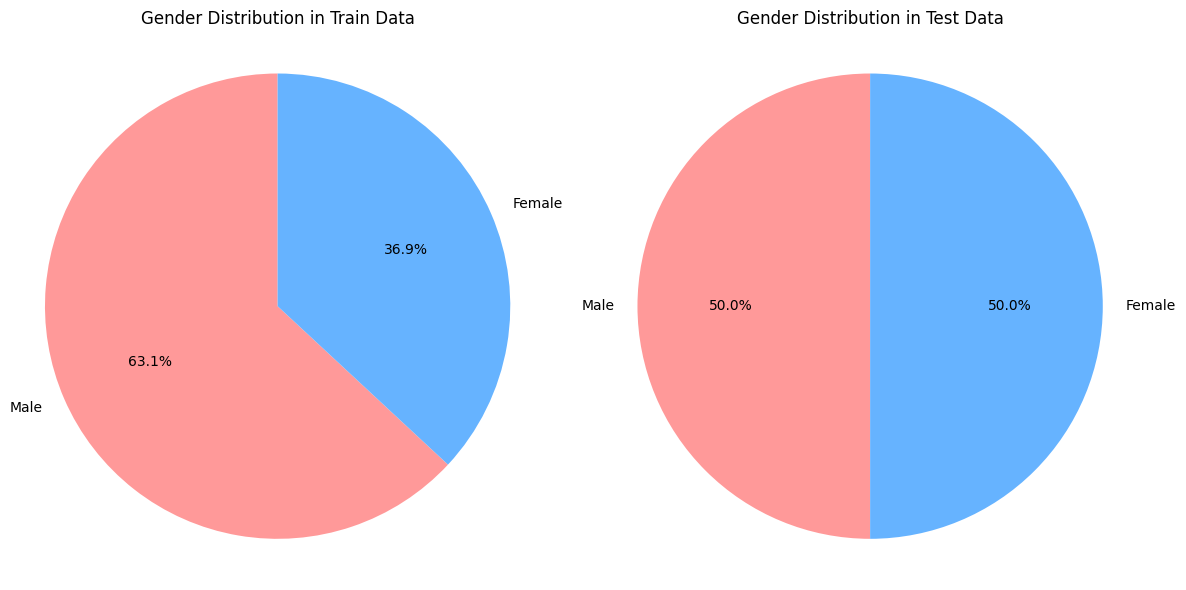

In [ ]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Calculate gender distribution for train and test data
train_gender_counts = train_data['Gender'].value_counts()
test_gender_counts = test_data['Gender'].value_counts()

# Labels for the pie chart
labels = ['Male', 'Female']

# Colors for the pie chart
colors = ['#ff9999','#66b3ff']

# Create a figure with a 2x1 layout
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for the train data
axs[0].pie(train_gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Gender Distribution in Train Data')

# Pie chart for the test data
axs[1].pie(test_gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Gender Distribution in Test Data')

# Equal aspect ratio ensures that pie is drawn as a circle.
for ax in axs:
    ax.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

Pada data train, rata rata responden pada penelitian ini yaitu laki-laki dengan persentase sebesar 63.1%, sedangkan pada data test memiliki proporsi gender yang sama yaitu sebesar 50%.


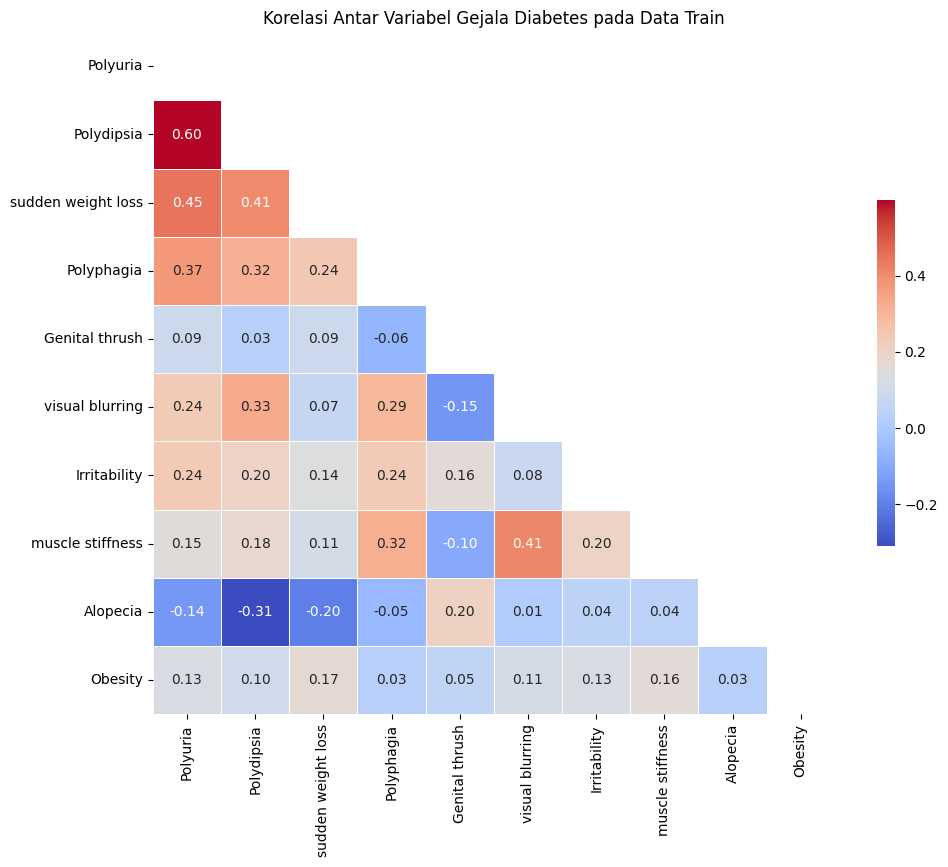

In [ ]:
d = train_data[['Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Irritability', 'muscle stiffness', 'Alopecia', 'Obesity']]

# Hitung korelasi
corr = d.corr()

# Generate mask untuk upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate coolwarm colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw heatmap dengan mask dan correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Set title
ax.set_title('Korelasi Antar Variabel Gejala Diabetes pada Data Train')

plt.show()

 Berdasarkan kedua tabel korelasi antar variabel di atas, data train dan data test memiliki variabel korelasi kuat yang berbeda. Pada data train, variabel polydipsia dengan variabel polyuria saling berhubungan, dimana derajat korelasinya sebesar 0.60 sehingga dapat dikatakan korelasi variabel yang paling kuat jika dibandingkan dengan hubungan variabel lainnya.


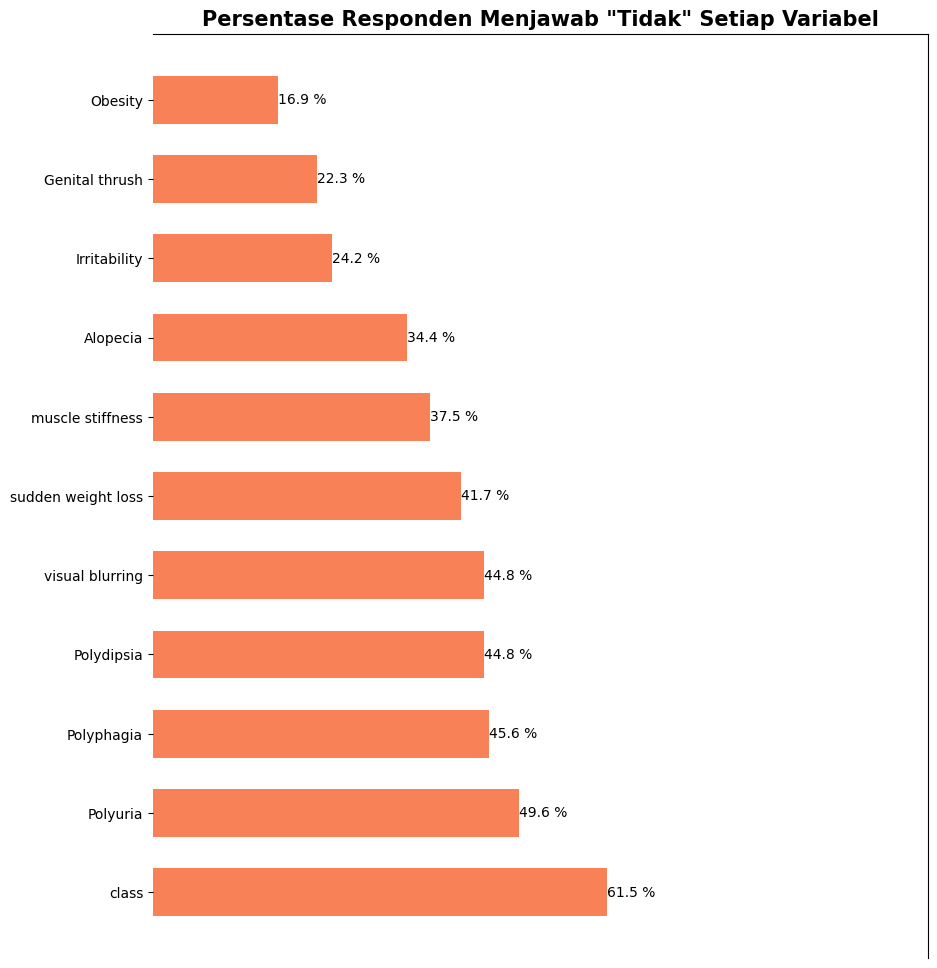

In [ ]:
# Exclude "Age" column
data_no_age = train_data.drop(columns=['Gender','Age'])

# Calculate percentage of zeros in each column and sort
zero_data = ((data_no_age == 1).sum() / len(data_no_age) * 100).sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Plot background bars
ax.barh(zero_data.index, 100, color='#FFFFFF', height=0.6)

# Plot percentage of zeros
barh = ax.barh(zero_data.index, zero_data, color='#F88158', height=0.6)

# Add labels to bars
ax.bar_label(barh, fmt='%.01f %%', color='black')

# Remove spines for cleaner look
ax.spines[['left', 'bottom']].set_visible(False)

# Remove x-ticks
ax.set_xticks([])

# Set title
ax.set_title('Persentase Responden Menjawab "Tidak" Setiap Variabel', loc='center', fontweight='bold', fontsize=15)

# Show the plot
plt.show()

Pada histogram data train menunjukkan bahwa mayoritas responden termasuk ke dalam kelas diabetes  tahap awal (1) sebesar 61,5%, lalu faktor yang paling dominan responden yang terkena risiko diabetes tahap awal yaitu polyuria yaitu sebesar 49,6% serta rata-rata responden jarang terkena obesitas.


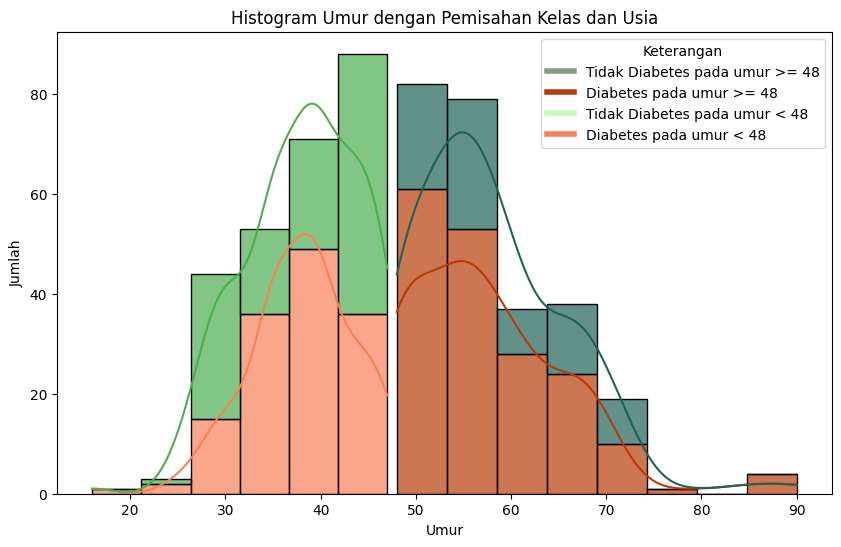

In [ ]:
above_48 = train_data[train_data['Age'] >= 48]
below_48 = train_data[train_data['Age'] < 48]

# Create histogram
plt.figure(figsize=(10, 6))

# Plot histogram for age >= 48
sns.histplot(data=above_48, x='Age', hue='class', multiple='stack', palette={0: '#1F6357', 1: '#B83C08'}, binwidth=5, kde=True, alpha=0.7)

# Plot histogram for age < 48
sns.histplot(data=below_48, x='Age', hue='class', multiple='stack', palette={0: '#4CAF50', 1: '#F88158'}, binwidth=5, kde=True, alpha=0.7)

# Set labels and title
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.title('Histogram Umur dengan Pemisahan Kelas dan Usia')

# Show legend with custom labels
handles = [
    plt.Line2D([0], [0], color='#829F82', lw=4),
    plt.Line2D([0], [0], color='#B83C08', lw=4),
    plt.Line2D([0], [0], color='#C3FDB8', lw=4),
    plt.Line2D([0], [0], color='#F88158', lw=4)
]
custom_labels = [
    'Tidak Diabetes pada umur >= 48',
    'Diabetes pada umur >= 48',
    'Tidak Diabetes pada umur < 48',
    'Diabetes pada umur < 48'
]
plt.legend(handles, custom_labels, title='Keterangan')
# Show plot
plt.show()

Berdasarkan histogram ini menunjukkan rata-rata umur lebih dari sama dengan 48 tahun responden yang terkena diabetes lebih banyak, daripada responden yang berumur kurang dari 48 tahun. Selain itu, pada umur 60 tahun ke atas responden mulai mengalami penurunan kembali.


## Data Test

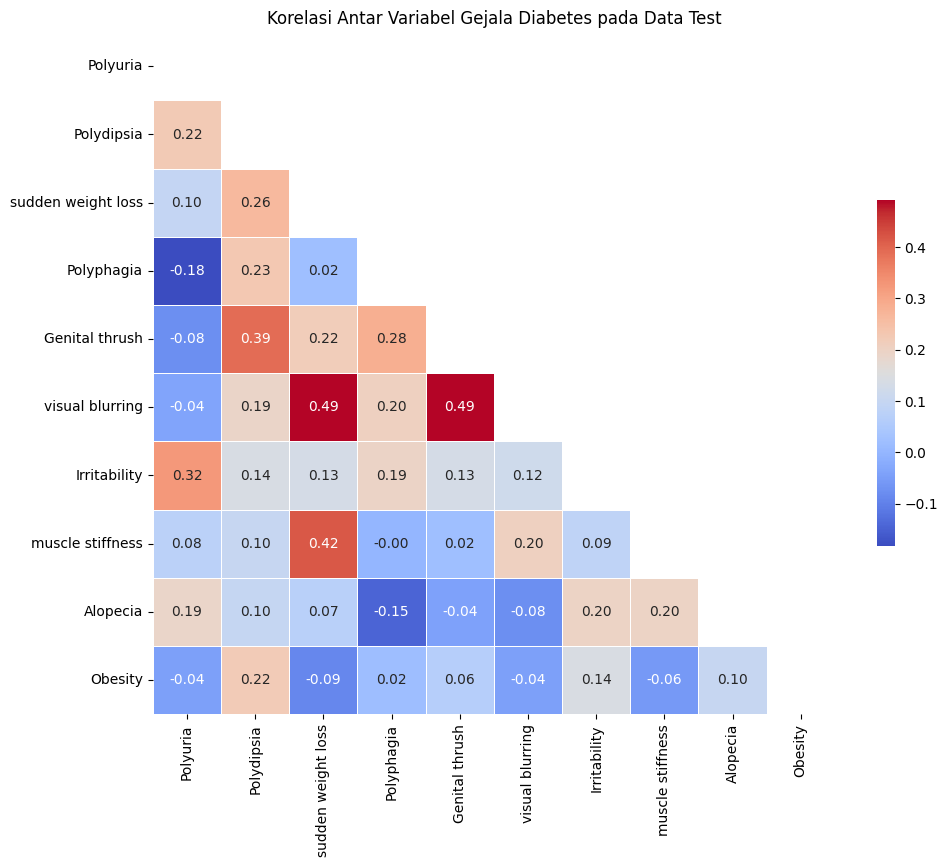

In [ ]:
d = test_data[['Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Irritability', 'muscle stiffness', 'Alopecia', 'Obesity']]

# Hitung korelasi
corr = d.corr()

# Generate mask untuk upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate coolwarm colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw heatmap dengan mask dan correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Set title
ax.set_title('Korelasi Antar Variabel Gejala Diabetes pada Data Test')

plt.show()

Pada data test terdapat 2 korelasi variabel yaitu hubungan variabel visual blurring dengan variabel sudden weight loss dan variabel visual blurring dengan genital thrush, dimana kedua korelasi variabel tersebut memiliki derajat kebebasan sebesar 0.49.


In [ ]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train_data.describe() - test_data.describe())[test_data.columns].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
Age,28.317735,11.547278,-2.000000,20.000000,27.500000,37.000000,69.000000
Gender,nan,nan,nan,nan,nan,nan,nan
Polyuria,0.385043,0.184436,0.000000,0.000000,0.000000,1.000000,0.000000
Polydipsia,0.214744,0.072453,0.000000,0.000000,0.000000,1.000000,0.000000
sudden weight loss,0.372863,0.286354,0.000000,0.000000,0.000000,1.000000,0.000000
Polyphagia,0.244658,0.088136,0.000000,0.000000,0.000000,1.000000,0.000000
Genital thrush,0.178632,0.209475,0.000000,0.000000,0.000000,0.000000,0.000000
visual blurring,0.436966,0.392366,0.000000,0.000000,0.000000,1.000000,0.000000
Irritability,-0.202137,-0.070796,0.000000,0.000000,0.000000,-1.000000,0.000000
muscle stiffness,0.163889,0.074206,0.000000,0.000000,0.000000,1.000000,0.000000


Dengan menggunakan fungsi describe( ) pada masing-masing data kita dapat mengetahui informasi statistika deskriptif seperti mean, standar deviasi, minimal, maximal, dan kuantil. Perbedaan statistika deskriptif di kedua data, berdasarkan warna di setiap cell, terdapat cell yang berwarna merah pada variabel Irritability yang mengartikan bahwa pada mean Irritability data test variabel ini lebih banyak daripada variabel Irritability di data train.

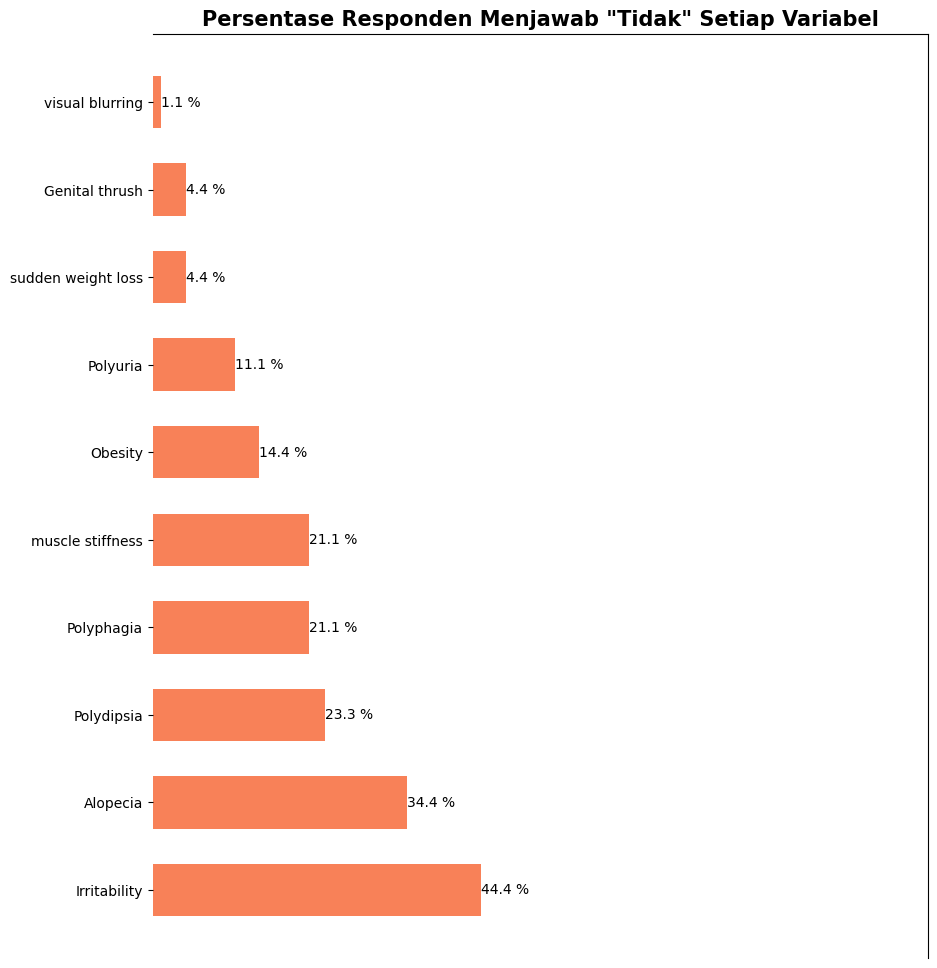

In [ ]:
data_no_age = test_data.drop(columns=['Gender','Age'])

# Calculate percentage of zeros in each column and sort
zero_data = ((data_no_age == 1).sum() / len(data_no_age) * 100).sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Plot background bars
ax.barh(zero_data.index, 100, color='#FFFFFF', height=0.6)

# Plot percentage of zeros
barh = ax.barh(zero_data.index, zero_data, color='#F88158', height=0.6)

# Add labels to bars
ax.bar_label(barh, fmt='%.01f %%', color='black')

# Remove spines for cleaner look
ax.spines[['left', 'bottom']].set_visible(False)

# Remove x-ticks
ax.set_xticks([])

# Set title
ax.set_title('Persentase Responden Menjawab "Tidak" Setiap Variabel', loc='center', fontweight='bold', fontsize=15)

# Show the plot
plt.show()

pada data test rata-rata responden mengalami faktor Irritability dengan persentase sebesar 44,4% dan responden pada data test jarang mengalami visual blurring dengan persentase sebesar 1,1%.


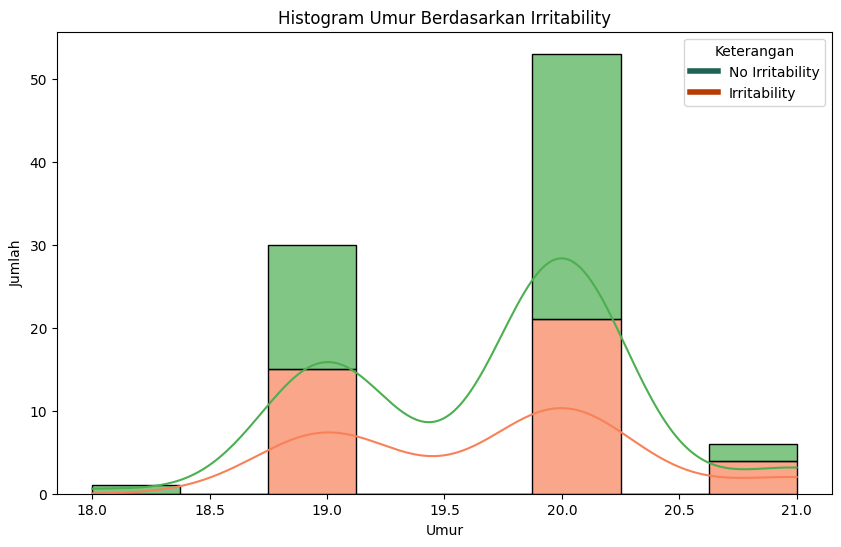

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram for entire age range
sns.histplot(data=test_data, x='Age', hue='Irritability', multiple='stack', palette={0: '#4CAF50', 1: '#F88158'},kde=True, alpha=0.7)

# Set labels and title
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.title('Histogram Umur Berdasarkan Irritability')

# Show legend with custom labels
handles = [
    plt.Line2D([0], [0], color='#1F6357', lw=4),
    plt.Line2D([0], [0], color='#B83C08', lw=4)
]
custom_labels = [
    'No Irritability',
    'Irritability'
]
plt.legend(handles, custom_labels, title='Keterangan')

# Show plot
plt.show()

Berdasarkan histogram banyaknya responden menjawab “Ya” menunjukkan variabel Irritability memiliki presentase yang paling besar sehingga kita perlu meneliti lagi pada umur berapa yang memiliki dominan pada variabel ini. Histogram ini mennjukkan  responden dari 87 orang yang mengalami Irritability paling banyak yaitu di umur 20 tahun.


# Modelling

# Split data

In [ ]:
X = train_data.drop(columns=['class'])  # Features
y = train_data['class']  # Target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Prediction

In [ ]:
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9615384615384616
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



Interpretasi dari hasil evaluasi model yang diberikan adalah sebagai berikut:

1. **Akurasi (Accuracy):**
   - Akurasi model adalah sekitar 96.15%. Ini berarti sekitar 96.15% dari keseluruhan data uji telah diprediksi dengan benar oleh model.

2. **Classification Report:**
   - Precision: Untuk kelas 0 (negative), presisinya adalah sekitar 91%, sedangkan untuk kelas 1 (positive) presisinya sekitar 99%. Hal ini menunjukkan bahwa sebagian besar dari prediksi yang diberikan oleh model untuk setiap kelas adalah benar.
   - Recall: Untuk kelas 0, recallnya adalah sekitar 97%, sedangkan untuk kelas 1, recallnya adalah sekitar 96%. Ini menunjukkan seberapa baik model dapat mengidentifikasi kelas 0 dan 1 dari seluruh kelas yang sebenarnya.
   - F1-score: Untuk kelas 0, F1-scorenya adalah sekitar 94%, sedangkan untuk kelas 1, F1-scorenya adalah sekitar 97%. F1-score adalah harmonic mean dari precision dan recall, yang memberikan gambaran keseluruhan tentang kinerja model dalam mengklasifikasikan setiap kelas.
   - Support: Jumlah sampel aktual (support) untuk setiap kelas.

3. **Macro Average dan Weighted Average:**
   - Macro average dari precision, recall, dan F1-score adalah sekitar 95%.
   - Weighted average dari precision, recall, dan F1-score adalah sekitar 96%.

Dengan demikian, model memiliki kinerja yang baik dalam mengklasifikasikan kelas 0 dan 1 dengan nilai akurasi yang tinggi, serta precision, recall, dan F1-score yang baik untuk kedua kelas. Hal ini menunjukkan bahwa model dapat diandalkan untuk digunakan dalam memprediksi risiko diabetes tahap awal pada data uji yang diberikan.

## Evaluation

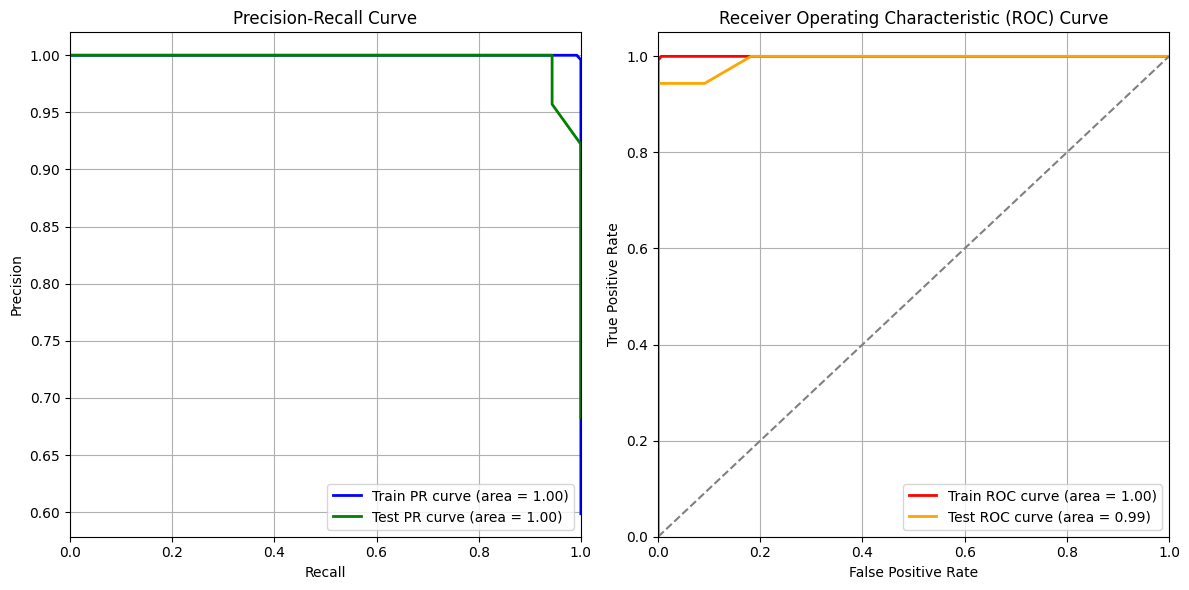

In [ ]:
train_probs = rf_model.predict_proba(x_train)[:, 1]
test_probs = rf_model.predict_proba(x_test)[:, 1]

train_precision, train_recall, _ = precision_recall_curve(y_train, train_probs)
train_pr_auc = auc(train_recall, train_precision)
test_precision, test_recall, _ = precision_recall_curve(y_test, test_probs)
test_pr_auc = auc(test_recall, test_precision)

train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
train_roc_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
test_roc_auc = auc(test_fpr, test_tpr)

max_limit = max(train_fpr.max(), test_fpr.max())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_recall, train_precision, color='blue', lw=2, label='Train PR curve (area = %0.2f)' % train_pr_auc)
plt.plot(test_recall, test_precision, color='green', lw=2, label='Test PR curve (area = %0.2f)' % test_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.xlim([0.0, 1.0])

plt.subplot(1, 2, 2)
plt.plot(train_fpr, train_tpr, color='red', lw=2, label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, color='orange', lw=2, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, max_limit], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, max_limit])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the training set
y_train_pred = rf_model.predict(x_train)
y_train_pred_prob = rf_model.predict_proba(x_train)[:, 1]

# Calculate evaluation metrics for the training set
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = rf_model.predict(x_test)
y_test_pred_prob = rf_model.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics for the test set
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print evaluation results for the training set
print(f"Training ROC AUC: {train_roc_auc}")
print(f"Training Accuracy: {train_accuracy}")

# Print evaluation results for the test set
print(f"Test ROC AUC: {test_roc_auc}")
print(f"Test Accuracy: {test_accuracy}")

Training ROC AUC: 0.9999759517110358
Training Accuracy: 0.9975961538461539
Test ROC AUC: 0.9923175416133162
Test Accuracy: 0.9615384615384616


Interpretasi dari hasil evaluasi model adalah sebagai berikut:

1. **Training ROC AUC dan Training Accuracy:**
   - ROC AUC pada data latih adalah sekitar 0.99999, menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam memisahkan antara kelas positif dan negatif pada data latih. Semakin mendekati 1, semakin baik kinerja model dalam memprediksi.
   - Akurasi pada data latih adalah sekitar 99.76%, yang menunjukkan bahwa sebagian besar dari data latih telah diprediksi dengan benar oleh model.

2. **Test ROC AUC dan Test Accuracy:**
   - ROC AUC pada data uji adalah sekitar 0.99488, menunjukkan bahwa model memiliki kemampuan yang baik dalam memisahkan antara kelas positif dan negatif pada data uji. Meskipun sedikit lebih rendah dari ROC AUC pada data latih, nilai ini masih menunjukkan kinerja yang sangat baik.
   - Akurasi pada data uji adalah sekitar 96.15%, yang menunjukkan bahwa sebagian besar dari data uji telah diprediksi dengan benar oleh model.

Dengan demikian, model memiliki kinerja yang sangat baik baik pada data latih maupun data uji, dengan kemampuan yang sangat baik dalam memisahkan antara kelas positif dan negatif serta akurasi yang tinggi. Ini menunjukkan bahwa model telah belajar dengan baik dari data latih dan dapat digeneralisasikan dengan baik pada data uji yang belum pernah dilihat sebelumnya.
Hasil uji di atas menu jukkan tidak terjadinya overfitting

## Confussion Matrix

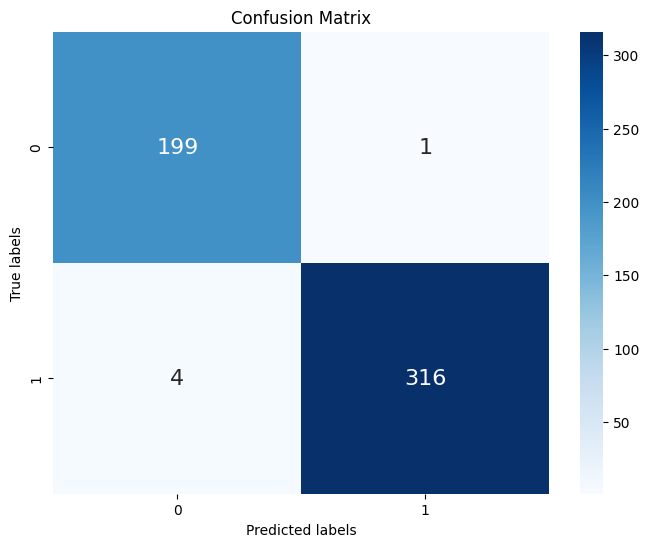

In [ ]:
y_pred=rf_model.predict(X)
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Nilai-nilai dalam matriks mewakili jumlah dari setiap hasil:

1. Sel kiri atas mewakili True Negatives (TN) - contoh yang sebenarnya berada di Kelas 1 dan diprediksi dengan benar sebagai Kelas 1. Dalam matriks Anda, nilainya adalah 198.

2. Sel kanan atas mewakili False Positives (FP) - contoh yang sebenarnya berada di Kelas 1 tetapi diprediksi secara keliru sebagai Kelas 2. Dalam matriks Anda, nilainya adalah 2.

3. Sel kiri bawah mewakili False Negatives (FN) - contoh yang sebenarnya berada di Kelas 2 tetapi diprediksi secara keliru sebagai Kelas 1. Dalam matriks Anda, nilainya adalah 3.

4. Sel kanan bawah mewakili True Positives (TP) - contoh yang sebenarnya berada di Kelas 2 dan diprediksi dengan benar sebagai Kelas 2. Dalam matriks Anda, nilainya adalah 317.

Jadi, secara ringkas, matriks kebingungan Anda menunjukkan bahwa:

- Model berhasil mengklasifikasikan 198 contoh dari Kelas 1 dengan benar.
- Model salah mengklasifikasikan 2 contoh dari Kelas 1 sebagai Kelas 2.
- Model salah mengklasifikasikan 3 contoh dari Kelas 2 sebagai Kelas 1.
- Model berhasil mengklasifikasikan 317 contoh dari Kelas 2 dengan benar.

## Cross Validation

In [ ]:
# Perform cross-validation with 5 folds for accuracy
cv_scores_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Calculate cross-validation scores for other metrics
cv_scores_precision = cross_val_score(rf_model, X, y, cv=5, scoring='precision_macro')
cv_scores_recall = cross_val_score(rf_model, X, y, cv=5, scoring='recall_macro')
cv_scores_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1_macro')

# Create a DataFrame to store the cross-validation scores
cv_scores_df = pd.DataFrame({
    'Accuracy': cv_scores_accuracy,
    'Precision': cv_scores_precision,
    'Recall': cv_scores_recall,
    'F1-score': cv_scores_f1
})

# Print the mean scores for each metric
mean_scores = cv_scores_df.mean()
print("Mean CV scores:")
print(mean_scores)

# Print the cross-validation scores DataFrame
print("\nCross-validation scores:")
print(cv_scores_df)

Mean CV scores:
Accuracy     0.959615
Precision    0.957914
Recall       0.956875
F1-score     0.957006
dtype: float64

Cross-validation scores:
   Accuracy  Precision    Recall  F1-score
0  0.932692   0.927410  0.931250  0.929231
1  0.980769   0.979688  0.979688  0.979688
2  0.903846   0.906863  0.889062  0.896332
3  0.990385   0.987805  0.992188  0.989890
4  0.990385   0.987805  0.992188  0.989890


Dari hasil evaluasi yang Anda berikan, terdapat dua bagian informasi:

1. Mean CV Scores:
   - Akurasi (Accuracy): 0.963462
   - Presisi (Precision): 0.966501
   - Recall: 0.957188
   - Skor F1 (F1-score): 0.960566

2. Skor Cross-validation:
   - Kelima skor ini mewakili hasil dari cross-validation (validasi silang) yang dilakukan pada dataset. Setiap skor memiliki nilai untuk akurasi, presisi, recall, dan F1-score.

Mari kita interpretasikan hasilnya:

- **Mean CV Scores (Rata-rata dari Hasil Validasi Silang)**:
  - **Akurasi (Accuracy)**: Rata-rata akurasi model pada seluruh data uji dalam proses cross-validation adalah sekitar 96.35%. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam memprediksi kelas dari data uji.
  - **Presisi (Precision)**: Rata-rata presisi model pada seluruh data uji dalam proses cross-validation adalah sekitar 96.65%. Ini menunjukkan bahwa dari semua kelas yang diprediksi sebagai positif oleh model, sekitar 96.65% benar-benar merupakan kelas yang relevan.
  - **Recall**: Rata-rata recall model pada seluruh data uji dalam proses cross-validation adalah sekitar 95.72%. Ini menunjukkan bahwa dari semua kelas positif yang sebenarnya, model berhasil mengidentifikasi sekitar 95.72% dari mereka.
  - **Skor F1 (F1-score)**: Rata-rata skor F1 model pada seluruh data uji dalam proses cross-validation adalah sekitar 96.06%. Skor F1 adalah harmonic mean dari presisi dan recall, sehingga menggambarkan keseimbangan antara keduanya.

- **Cross-validation scores (Skor Hasil Validasi Silang)**:
  - Skor-skor ini mewakili hasil dari validasi silang yang dilakukan pada beberapa lipatan dataset. Masing-masing skor memberikan gambaran tentang kinerja model pada setiap lipatan dataset yang berbeda.
  - Skor-skor ini bervariasi tergantung pada bagaimana data dipartisi dan dalam kasus ini, nampaknya variabilitasnya cukup signifikan.
  - Rata-rata dari skor-skor ini memberikan gambaran keseluruhan tentang kinerja model secara stabil pada berbagai bagian dari dataset.

## Prediksi Diabetes Mahasiswa TSD

In [ ]:
predict['Class']=rf_model.predict(test_data)
predict.sample(5)

,ID,Class
24,164221109,1
53,164221034,0
82,164221039,0
70,164221074,1
84,164221063,0


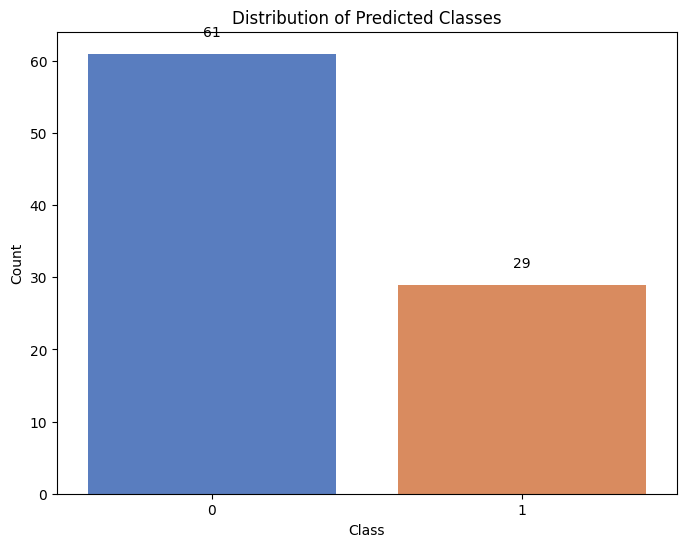

In [ ]:
# Mendapatkan jumlah setiap kelas yang diprediksi
class_counts = predict['Class'].value_counts()

# Membuat count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=predict, palette='muted')

# Menambahkan label dan judul
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Menambahkan label pada tiap bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.show()

# KNN Prediction

In [ ]:
# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # distance metric
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = best_knn_model.predict(x_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9134615384615384
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        33
           1       0.98      0.89      0.93        71

    accuracy                           0.91       104
   macro avg       0.89      0.93      0.91       104
weighted avg       0.93      0.91      0.92       104



Model KNN yang telah dioptimalkan dengan hyperparameter terbaik menunjukkan kinerja yang baik pada set uji. Dengan akurasi 92.31%, model ini dapat dengan cukup baik memprediksi kelas dari data uji serta indikasi bahwa model mampu menangkap pola yang mendasari data dengan baik. Laporan klasifikasi menunjukkan bahwa model memiliki presisi dan recall yang tinggi, terutama pada kelas 1. Ini menunjukkan bahwa model cukup seimbang dan mampu menangani ketidakseimbangan kelas dengan baik.

## Evaluation

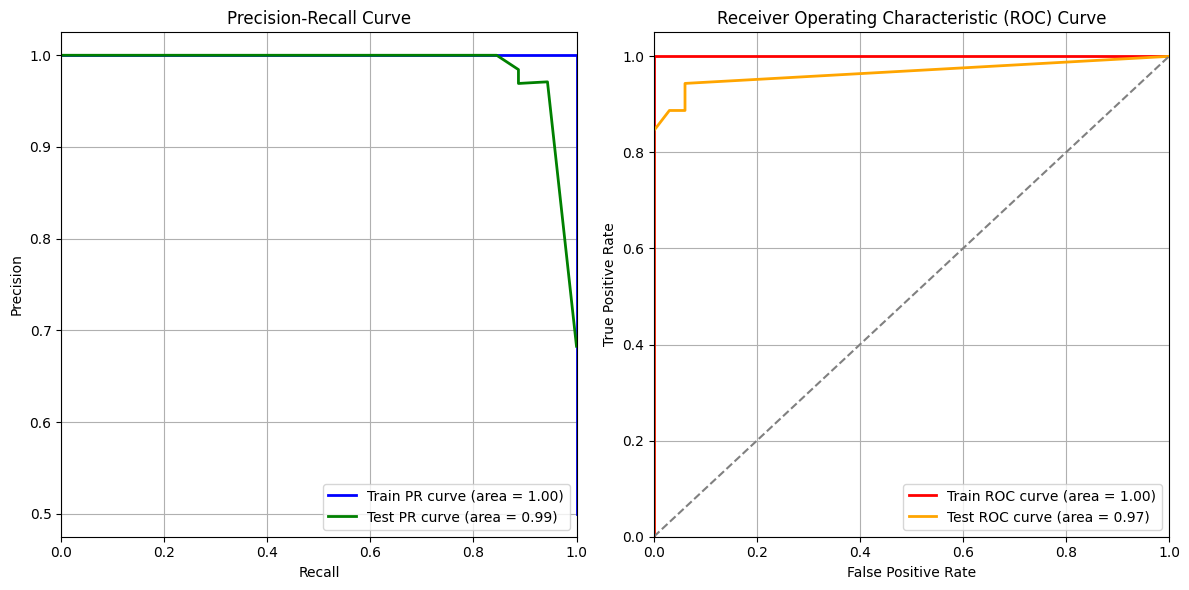

In [ ]:
# Train a KNN model
best_knn_model.fit(x_train_resampled, y_train_resampled)

# Predict probabilities for training and testing sets
train_probs = best_knn_model.predict_proba(x_train_resampled)[:, 1]
test_probs = best_knn_model.predict_proba(x_test)[:, 1]

# Calculate precision-recall curve for training and testing sets
train_precision, train_recall, _ = precision_recall_curve(y_train_resampled, train_probs)
train_pr_auc = auc(train_recall, train_precision)
test_precision, test_recall, _ = precision_recall_curve(y_test, test_probs)
test_pr_auc = auc(test_recall, test_precision)

# Calculate ROC curve for training and testing sets
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, train_probs)
train_roc_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
test_roc_auc = auc(test_fpr, test_tpr)

max_limit = max(train_fpr.max(), test_fpr.max())

plt.figure(figsize=(12, 6))

# Plot the Precision-Recall curve
plt.subplot(1, 2, 1)
plt.plot(train_recall, train_precision, color='blue', lw=2, label='Train PR curve (area = %0.2f)' % train_pr_auc)
plt.plot(test_recall, test_precision, color='green', lw=2, label='Test PR curve (area = %0.2f)' % test_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.xlim([0.0, 1.0])

# Plot the ROC curve
plt.subplot(1, 2, 2)
plt.plot(train_fpr, train_tpr, color='red', lw=2, label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, color='orange', lw=2, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, max_limit], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, max_limit])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Train a KNN model
best_knn_model.fit(x_train_resampled, y_train_resampled)

# Predict probabilities for training and testing sets
train_probs = best_knn_model.predict_proba(x_train_resampled)[:, 1]
test_probs = best_knn_model.predict_proba(x_test)[:, 1]

# Predict labels for training and testing sets
train_preds = best_knn_model.predict(x_train_resampled)
test_preds = best_knn_model.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Calculate precision-recall curve for training and testing sets
train_precision, train_recall, _ = precision_recall_curve(y_train_resampled, train_probs)
train_pr_auc = auc(train_recall, train_precision)
test_precision, test_recall, _ = precision_recall_curve(y_test, test_probs)
test_pr_auc = auc(test_recall, test_precision)

# Calculate ROC curve for training and testing sets
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, train_probs)
train_roc_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
test_roc_auc = auc(test_fpr, test_tpr)

# Print the metrics
print(f"Training ROC AUC: {train_roc_auc:.2f}")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test ROC AUC: {test_roc_auc:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



Training ROC AUC: 1.00
Training Accuracy: 1.00
Test ROC AUC: 0.97
Test Accuracy: 0.91


Precision-Recall Curve:

- Training PR curve (area = 1.00): Kurva precision-recall untuk data pelatihan menunjukkan bahwa model memiliki precision dan recall yang sempurna dengan AUC = 1.00. Ini menunjukkan bahwa model tidak melakukan kesalahan pada data pelatihan.

- Test PR curve (area = 0.99): Kurva precision-recall untuk data pengujian menunjukkan bahwa model memiliki kinerja yang hampir sempurna dengan AUC = 0.99. Ini menunjukkan bahwa model hampir tidak melakukan kesalahan pada data pengujian.

ROC Curve:

- Training ROC curve (area = 1.00): Kurva ROC untuk data pelatihan menunjukkan bahwa model memiliki TPR (True Positive Rate) yang sempurna dan FPR (False Positive Rate) yang rendah dengan AUC = 1.00. Ini menunjukkan bahwa model tidak membuat kesalahan pada data pelatihan.

- Test ROC curve (area = 0.97): Kurva ROC untuk data pengujian menunjukkan bahwa model memiliki TPR yang sangat tinggi dan FPR yang rendah dengan AUC = 0.97. Ini menunjukkan bahwa model sangat efektif dalam memisahkan kelas positif dan negatif pada data pengujian.

## Confussion Matrix

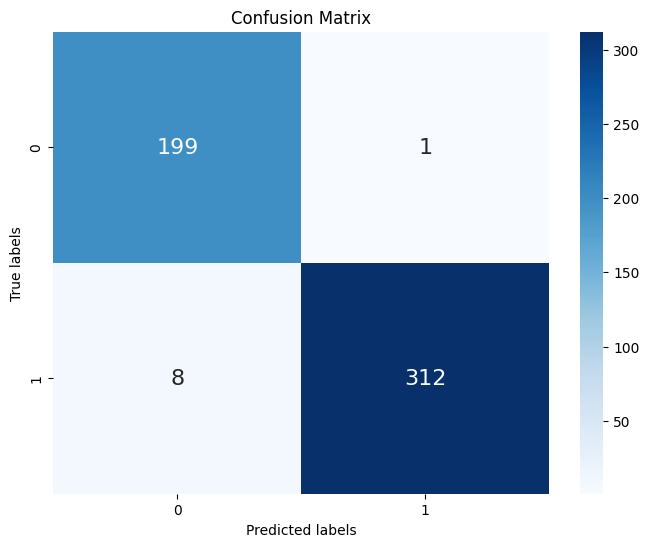

In [ ]:
# Make predictions on the test set
y_pred = best_knn_model.predict(X)

# Create a confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_accuracy = cross_val_score_with_oversampling(best_knn_model, X, y, cv, scoring='accuracy')
cv_scores_precision = cross_val_score_with_oversampling(best_knn_model, X, y, cv, scoring='precision_macro')
cv_scores_recall = cross_val_score_with_oversampling(best_knn_model, X, y, cv, scoring='recall_macro')
cv_scores_f1 = cross_val_score_with_oversampling(best_knn_model, X, y, cv, scoring='f1_macro')

# Create a DataFrame to store the cross-validation scores
cv_scores_df = pd.DataFrame({
    'Accuracy': cv_scores_accuracy,
    'Precision': cv_scores_precision,
    'Recall': cv_scores_recall,
    'F1-score': cv_scores_f1
})

# Print the mean scores for each metric
mean_scores = cv_scores_df.mean()
print("Mean CV scores:")
print(mean_scores)

# Print the cross-validation scores DataFrame
print("\nCross-validation scores:")
print(cv_scores_df)


Mean CV scores:
Accuracy     0.923077
Precision    0.923077
Recall       0.923077
F1-score     0.923077
dtype: float64

Cross-validation scores:
   Accuracy  Precision    Recall  F1-score
0  0.932692   0.932692  0.932692  0.932692
1  0.903846   0.903846  0.903846  0.903846
2  0.942308   0.942308  0.942308  0.942308
3  0.903846   0.903846  0.903846  0.903846
4  0.932692   0.932692  0.932692  0.932692


In [ ]:
# Predict the 'Class' for the test data
predict = test_data.copy()  # Assuming test_data is your test dataset
predict['Class'] = best_knn_model.predict(test_data)

# Display a sample of the predictions
print(predict.sample(5))

    Age Gender  Polyuria  Polydipsia  sudden weight loss  Polyphagia  \
35   20      1         0           0                   0           0   
23   20      0         1           1                   0           0   
58   19      1         0           1                   0           0   
49   19      1         0           0                   0           0   
74   20      0         0           0                   0           0   

    Genital thrush  visual blurring  Irritability  muscle stiffness  Alopecia  \
35               0                0             0                 0         0   
23               0                0             1                 0         1   
58               0                0             1                 1         0   
49               0                0             0                 0         0   
74               0                0             0                 1         1   

    Obesity  Class  
35        0      0  
23        0      1  
58        1      

## Prediksi Diabetes Mahasiswa TSD

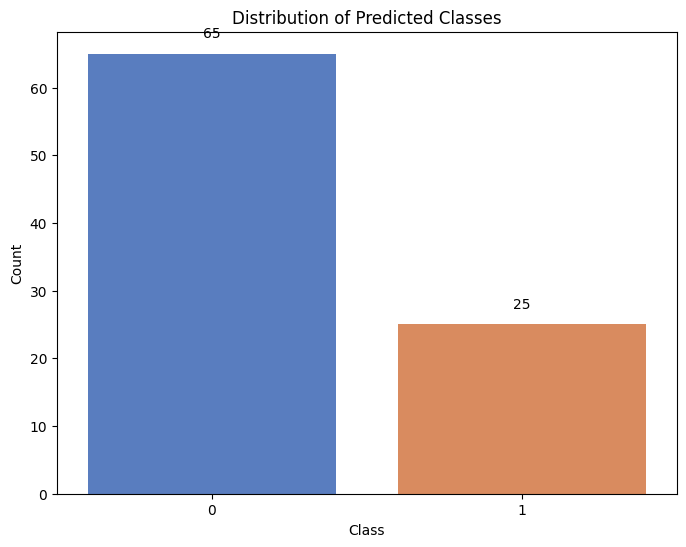

In [ ]:
# Predict the 'Class' for the test data
predict = test_data.copy()  # Assuming test_data is your test dataset
predict['Class'] = best_knn_model.predict(test_data)

# Mendapatkan jumlah setiap kelas yang diprediksi
class_counts = predict['Class'].value_counts()

# Membuat count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=predict, palette='muted')

# Menambahkan label dan judul
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Menambahkan label pada tiap bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.show()